# Tasca sprint 8: Hypothesis testing

### Ejercicio 1:

Selecciona un atributo del conjunto de datos. Calcula el p-value y di si descarta la hipótesis nula usando un alfa de 0.05.

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
mlb = pd.read_csv('mlbbat10.csv', encoding='utf-8')
mlb

,name,team,position,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,B Wood,KC,P,3,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000
1195,M Wuertz,OAK,P,4,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000
1196,M Zagurski,PHI,P,7,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000
1197,B Ziegler,OAK,P,6,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000


In [8]:
mlb.columns

Index(['name', 'team', 'position', 'game', 'at_bat', 'run', 'hit', 'double',
       'triple', 'home_run', 'rbi', 'total_base', 'walk', 'strike_out',
       'stolen_base', 'caught_stealing', 'obp', 'slg', 'bat_avg'],
      dtype='object')

<AxesSubplot:xlabel='hit', ylabel='Count'>

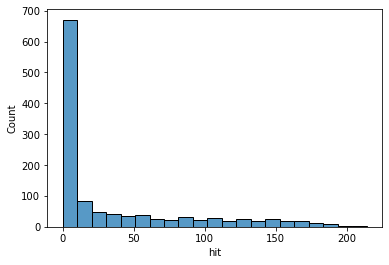

In [9]:
sns.histplot(mlb['hit'])

Una de las condiciones que debemos asumir para utilizar los métodos que tomaremos más adelante es que la distribución de la muestra es gaussiana. Viendo el histograma anterior ya podemos ver que no se parece a una distribución gaussiana, pero podemos comprobarlo utilizando el test Shapiro:

In [21]:
from scipy.stats import shapiro

In [29]:
stat, p = shapiro(mlb['hit'])
print('stat=%.3f, p=%.9f' % (stat, p))

stat=0.721, p=0.000000000


In [31]:
stat, p = shapiro(mlb[mlb['hit']>75]['hit'])
print('stat=%.3f, p=%.9f' % (stat, p))

stat=0.962, p=0.000003692


Vemos que la muestra no se pude considerar gaussiana, ni siquiera eliminando los valores más bajos. A pesar de ello, se procederá con el análisis, ya que no tenemos mejores datos para utilizar en este dataset.

In [10]:
mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1199 non-null   object 
 1   team             1199 non-null   object 
 2   position         1199 non-null   object 
 3   game             1199 non-null   int64  
 4   at_bat           1199 non-null   int64  
 5   run              1199 non-null   int64  
 6   hit              1199 non-null   int64  
 7   double           1199 non-null   int64  
 8   triple           1199 non-null   int64  
 9   home_run         1199 non-null   int64  
 10  rbi              1199 non-null   int64  
 11  total_base       1199 non-null   int64  
 12  walk             1199 non-null   int64  
 13  strike_out       1199 non-null   int64  
 14  stolen_base      1199 non-null   int64  
 15  caught_stealing  1199 non-null   int64  
 16  obp              1199 non-null   float64
 17  slg           

In [11]:
mlb.describe()

,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000,1199.000000
mean,50.534612,137.909091,17.771476,35.491243,7.077565,0.722269,3.847373,16.920767,55.555463,13.159299,28.612177,2.46789,0.941618,0.205531,0.237613,0.159374
std,49.544371,188.126913,27.051262,51.908498,10.812941,1.601990,7.372345,26.636637,83.717936,20.737459,38.441364,6.48013,2.161646,0.173192,0.236077,0.144587
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,37.000000,3.000000,6.000000,1.000000,0.000000,0.000000,2.000000,8.000000,2.000000,10.000000,0.00000,0.000000,0.255000,0.273000,0.195000
75%,84.000000,225.000000,26.500000,56.000000,11.000000,1.000000,4.000000,25.000000,82.500000,20.000000,44.000000,1.00000,1.000000,0.324000,0.394000,0.259000
max,162.000000,680.000000,115.000000,214.000000,49.000000,14.000000,54.000000,126.000000,351.000000,114.000000,211.000000,68.00000,18.000000,1.000000,4.000000,1.000000


In [12]:
mlb.corr()

,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
game,1.000000,0.938213,0.903774,0.924026,0.890881,0.625684,0.765198,0.880960,0.914098,0.858526,0.879365,0.561894,0.629483,0.473870,0.484002,0.463894
at_bat,0.938213,1.000000,0.970168,0.991519,0.954346,0.662491,0.816416,0.939538,0.979084,0.906541,0.921892,0.614504,0.678982,0.502603,0.513554,0.497166
run,0.903774,0.970168,1.000000,0.977381,0.949386,0.684214,0.859812,0.945531,0.981973,0.925169,0.907874,0.642059,0.684150,0.486126,0.507882,0.476034
hit,0.924026,0.991519,0.977381,1.000000,0.964365,0.665552,0.822227,0.945025,0.987289,0.900749,0.897921,0.617696,0.681796,0.498144,0.513439,0.497997
double,0.890881,0.954346,0.949386,0.964365,1.000000,0.608029,0.836845,0.941710,0.971456,0.890788,0.882539,0.530795,0.592942,0.482109,0.511973,0.477903
triple,0.625684,0.662491,0.684214,0.665552,0.608029,1.000000,0.448599,0.570545,0.647986,0.578608,0.627790,0.657320,0.627817,0.327566,0.339161,0.330783
home_run,0.765198,0.816416,0.859812,0.822227,0.836845,0.448599,1.000000,0.935789,0.899254,0.839335,0.846167,0.353880,0.424963,0.401872,0.478250,0.385235
rbi,0.880960,0.939538,0.945531,0.945025,0.941710,0.570545,0.935789,1.000000,0.976641,0.902460,0.900195,0.482686,0.555663,0.470728,0.514873,0.461227
total_base,0.914098,0.979084,0.981973,0.987289,0.971456,0.647986,0.899254,0.976641,1.000000,0.917438,0.918306,0.570200,0.635621,0.489843,0.523806,0.484936
walk,0.858526,0.906541,0.925169,0.900749,0.890788,0.578608,0.839335,0.902460,0.917438,1.000000,0.891127,0.546750,0.585391,0.486626,0.482184,0.443362


Se elegirá la variable 'Hit', y se toma una muestra de los datos:

In [14]:
hit = mlb['hit']

In [15]:
k = 100
hit_sample = hit.sample(k)
hit_sample

142     112
1021      0
729       0
1180      0
813       0
       ... 
1166      0
568       4
1126      0
637       2
51      163
Name: hit, Length: 100, dtype: int64

In [16]:
hit_sample.describe()

count    100.000000
mean      36.270000
std       53.201134
min        0.000000
25%        0.000000
50%        6.500000
75%       62.000000
max      200.000000
Name: hit, dtype: float64

Con los siguientes datos
- mean (population) = 35.49
- std (populaton) = 51.91
- mean (sample) = 32.39
- std (sample) = 49.39
- n sample = 100

Elaboramos las hipótesis:
- H(0): La media es 35.49
- H(1): La media es diferente a 35.49

In [17]:
x = 32.39
mu = 35.54
sigma = 51.91
n = 100
alpha = 0.05
SE = (sigma/np.sqrt(n))

Z = (x - mu)/SE
print (Z)



-0.6068194952802926


In [18]:
from scipy.integrate import quad

def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

z_per, _ = quad(normalProbabilityDensity, np.NINF, Z)

print('Point Estimate Z-score Probability: ', round(z_per, 4))

Point Estimate Z-score Probability:  0.272


In [19]:
p_value = 1-0.272
print('p_value :', p_value)

p_value : 0.728


El valor p es muy grande, tenemos que p >> alpha. 
Esto indica que no podemos descartar la hipótesis nula (la media es 35,49).

### Ejercicio 2:

Continua con el conjunto de datos deportivos y selecciona dos atributos. Calcula el p-valor y di si descarta la hipótesis nula con un alfa de 5%

Comprobaremos si podemos inferir que hay una diferencia en la media de 'hit' para dos posiciones diferentes. Tomaremos 1B y 3B

In [32]:
mlb['position'].unique()

array(['OF', 'SS', '3B', '2B', '1B', 'DH', 'C', 'P', '-'], dtype=object)

<AxesSubplot:xlabel='position', ylabel='Count'>

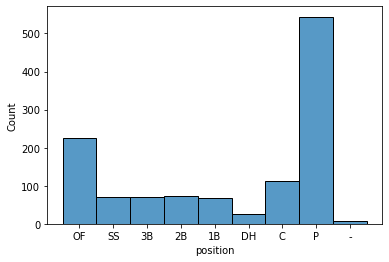

In [33]:
sns.histplot(mlb['position'])

In [34]:
#Se recoge una muestra del 10% de cada posición
mlb_pos = mlb.groupby('position').apply(pd.DataFrame.sample, frac = 0.1)
mlb_pos

name team position  game  at_bat  run  hit  double  \
position                                                                  
-        473      J Gerut   SD        -    32      71    7   14       4   
1B       231       X Nady  CHC       1B   119     317   33   81      13   
         33       J Loney  LAD       1B   161     588   67  157      41   
         54        A Huff   SF       1B   157     569  100  165      35   
         544  M Hoffpauir  CHC       1B    24      52    5    9       3   
...                   ...  ...      ...   ...     ...  ...  ...     ...   
SS       375    A Casilla  MIN       SS    69     152   26   42       7   
         614       A Diaz  PIT       SS    22      33    0    8       1   
         682    O Navarro  HOU       SS    14      20    2    1       0   
         125    C Izturis  BAL       SS   150     473   42  109      13   
         272    Y Escobar  ATL       SS    75     261   28   62      12   

              triple  home_run  rbi  total_base  walk  strike_out  \
position                                                            
-        473       1         2    8          26     3          17   
1B       231       0         6   33         112    17          85   
         33        2        10   88         232    52          95   
         54        5        26   86         288    83          91   
         544       0         0    5          12     5          15   
...              ...       ...  ...         ...   ...         ...   
SS       375       4         1   20          60    13          17   
         614       0         0    2           9     3          10   
         682       0         0    0           1     5           4   
         125       1         1   28         127    25          53   
         272       0         0   19          74    37          31   

              stolen_base  caught_stealing    obp    slg  bat_avg  
position                                                           
-        473            0                1  0.230  0.366    0.197  
1B       231            0                0  0.306  0.353    0.256  
         33            10                5  0.329  0.395    0.267  
         54             7                0  0.385  0.506    0.290  
         544            0                0  0.246  0.231    0.173  
...                   ...              ...    ...    ...      ...  
SS       375            6                1  0.331  0.395    0.276  
         614            0                1  0.306  0.273    0.242  
         682            0                0  0.240  0.050    0.050  
         125           11                5  0.277  0.268    0.230  
         272            5                1  0.334  0.284    0.238  

[119 rows x 19 columns]

In [35]:
fb = mlb_pos[mlb_pos['position'] == '1B']['hit']
sb = mlb_pos[mlb_pos['position'] == '2B']['hit']

In [36]:
sb

position     
2B        210     86
          433     22
          142    112
          31     169
          22     184
          391     39
          155    117
Name: hit, dtype: int64

Las hipótesis que tenemos son:
- h0 = las medias de las muestras para las dos posiciones son iguales.
- h1 = las medias no son iguales

Se realizará un test Student's t-test, para lo que:
- Asumimos que las muestras son independientes (10% del total).
- Asumimos que siguen una distribución normal (a pesar de que claramente no se cumpla).
- La varianza es la misma.

In [37]:
from scipy.stats import ttest_ind

In [38]:
stat, p = ttest_ind(fb, sb)
print(stat, p)


-0.2486999979108939 0.8077982322217788


In [39]:
print('p-value:', round(p,2))

p-value: 0.81


p es mucho mayor que alfa, por lo que no podemos descartar la hipótesis nula.

### Ejercicio 3:

Continua con el conjunto de datos deportivos y selecciona tres atributos. Calcula el p-valor y di si descarta la hipótesis nula con un alfa de 5%


Vamos a comparar si hay diferencias en el 'bart_avg' entre tres de los equipos. Como las muestras no serán muy grandes, utilizamos un 75% de los datos:

In [42]:
mlb_team = mlb.groupby('team').apply(pd.DataFrame.sample, frac = 0.75)
mlb_team

name team position  game  at_bat  run  hit  double  triple  \
team                                                                            
ARI  747      K Schmidt  ARI        C     4       8    0    1       0       0   
     1105      K Mulvey  ARI        P     2       0    0    0       0       0   
     1171      D Stange  ARI        P     4       0    0    0       0       0   
     1051   J Gutierrez  ARI        P    55       0    0    0       0       0   
     638       D Hudson  ARI        P    11      27    1    4       2       0   
...                 ...  ...      ...   ...     ...  ...  ...     ...     ...   
WSH  90     R Zimmerman  WSH       3B   142     525   85  161      32       0   
     722       J Martin  WSH        P     8      12    0    2       1       0   
     736   J Zimmermann  WSH        P     7      10    0    2       0       0   
     302       W Harris  WSH       OF   132     224   25   41       6       2   
     905        M Capps  WSH        P    45       1    0    0       0       0   

           home_run  rbi  total_base  walk  strike_out  stolen_base  \
team                                                                  
ARI  747          0    0           1     1           0            0   
     1105         0    0           0     0           0            0   
     1171         0    0           0     0           0            0   
     1051         0    0           0     0           0            0   
     638          0    6           6     0           7            0   
...             ...  ...         ...   ...         ...          ...   
WSH  90          25   85         268    69          98            4   
     722          0    0           3     0           4            0   
     736          0    0           2     0           2            0   
     302         10   32          81    33          60            5   
     905          0    0           0     0           1            0   

           caught_stealing    obp    slg  bat_avg  
team                                               
ARI  747                 0  0.222  0.125    0.125  
     1105                0  0.000  0.000    0.000  
     1171                0  0.000  0.000    0.000  
     1051                0  0.000  0.000    0.000  
     638                 0  0.179  0.222    0.148  
...                    ...    ...    ...      ...  
WSH  90                  1  0.388  0.510    0.307  
     722                 0  0.167  0.250    0.167  
     736                 0  0.200  0.200    0.200  
     302                 2  0.291  0.362    0.183  
     905                 0  0.000  0.000    0.000  

[901 rows x 19 columns]

In [44]:
mlb_team['team'].unique()

array(['ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CIN', 'CLE', 'COL', 'CWS',
       'DET', 'FLA', 'HOU', 'KC', 'LAA', 'LAD', 'MIL', 'MIN', 'NYM',
       'NYY', 'OAK', 'PHI', 'PIT', 'SD', 'SEA', 'SF', 'STL', 'TB', 'TEX',
       'TOR', 'WSH'], dtype=object)

<AxesSubplot:xlabel='team', ylabel='Count'>

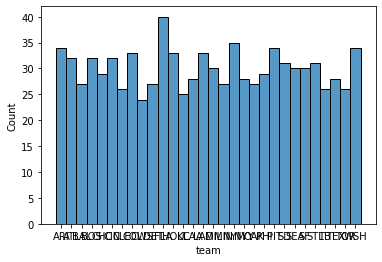

In [43]:
sns.histplot(mlb_team['team'])

ANOVA test

Vamos a comparar los equipos: 'BAL', 'NYY' y 'TEX'

In [46]:
bal = mlb_team[mlb_team['team'] == 'BAL']['bat_avg']
nyy = mlb_team[mlb_team['team'] == 'NYY']['bat_avg']
tex = mlb_team[mlb_team['team'] == 'TEX']['bat_avg']

Las hipótesis que tenemos son:
- h0 = las medias de las muestras para los tres equipos son iguales.
- h1 = las medias no son iguales

Se realizará un test ANOVA para lo que:
- Asumimos que las muestras son independientes (10% del total).
- Asumimos que siguen una distribución normal (a pesar de que claramente no se cumpla).
- La varianza es la misma.

In [47]:
from scipy.stats import f_oneway

stat, p = f_oneway(bal, nyy, tex)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=2.176, p=0.120


El p-value es mayor que 0,05, por lo que no podemos descartar la hipótesis nula. No podemos inferir que existan diferencias entre las medias de las tres muestras.